In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_boston  # 사이킷런 데이타셋

In [2]:
# Data Import

from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [3]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [4]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [5]:
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [6]:
data = df

In [7]:
data.isnull().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

In [8]:
# Div X, y

X = data.drop(columns=['Pulse'], axis=1).values
y = data['Pulse'].values

Y = pd.get_dummies(y).values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [10]:
# n_features : represents the number of features you want to have for each time step
n_features = 1

# Make X to 3D format
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [11]:
X.shape

(20, 5, 1)

In [12]:
import numpy as np

# Make Y suitable for X.shape
Y = np.argmax(Y, axis=1).reshape(-1, 1)

In [13]:
Y.shape

(20, 1)

In [14]:
# X.shape[0] = rows, X.shape[1] = columns(In code, it's features)
n_steps = X.shape[1]
n_steps

5

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [17]:
# Make Model
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(n_steps,n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 20)             1760      
                                                                 
 dropout_2 (Dropout)         (None, 5, 20)             0         
                                                                 
 lstm_3 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [25]:
N_EPOCHS = 50
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=30)
pred_y = model.predict(X_test)

Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 0.0835
Epoch 2/50
1/1 [==============================] - 0s 21ms/step - loss: 0.0842
Epoch 3/50
1/1 [==============================] - 0s 18ms/step - loss: 0.0835
Epoch 4/50
1/1 [==============================] - 0s 21ms/step - loss: 0.0834
Epoch 5/50
1/1 [==============================] - 0s 20ms/step - loss: 0.0833
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.0831
Epoch 7/50
1/1 [==============================] - 0s 18ms/step - loss: 0.0857
Epoch 8/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0904
Epoch 9/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0835
Epoch 10/50
1/1 [==============================] - 0s 21ms/step - loss: 0.0836
Epoch 11/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0860
Epoch 12/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0865
Epoch 13/50
1/1 [==============================] - 0s 19ms/step

In [26]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 811ms/step - loss: 0.0827


0.08273689448833466

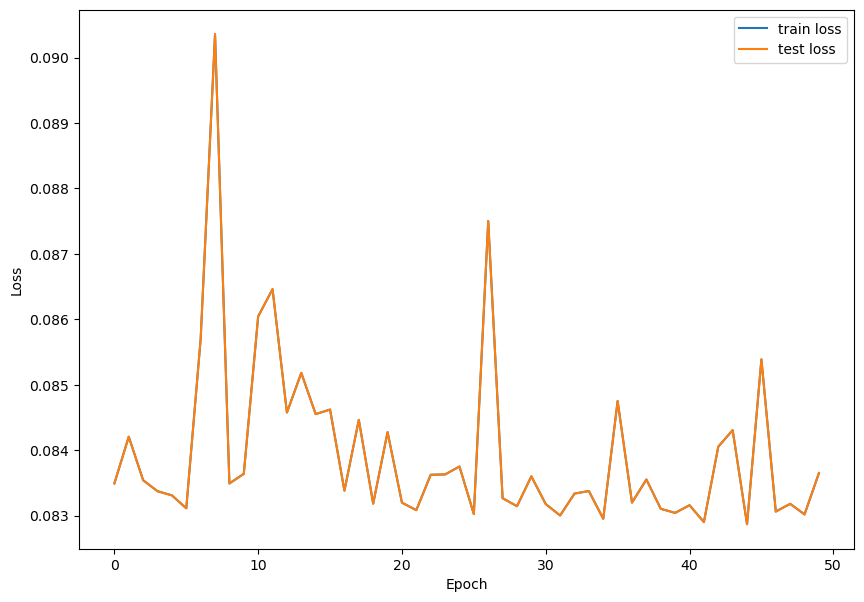

In [27]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()